### Introduction to Python
You will need to have a version of Python installed (hopefully a new version like 3.9 and above). You will also need to have some of the standard Python libraries installed, either via 'pip install ...' or via a conda environment. Libraries that you will need for this class include: numpy, scipy, matplotlib. 

For folks who are used to matlab, note that Python starts with the zero index while Matlab starts with index 1. 

In [1]:
# Basic Operations 
# -- similar to many basic programming languages (C, etc.)

# use the python function 'print' to print the output
print(2 + 2)
print(2 * 2)
print(2 / 2)
print(2 - 2 * 7)  # Order of operations matters
print((2 - 2) * 7)

4
4
1.0
-12
0


#### Notice a big difference with C or Matlab -- no semicolons needed at the end of statements! However, we will need colon symbols for indicating an indented block (see the loops below)

In [2]:
# Assign variables using '=' symbol
a = 2 + 2
print(a)

4


In [3]:
# Loops
count = 0  # Initialize the variable "count"

# Add all the numbers 1-10
for ii in range(10):  # note that range(10) = [0, 2, ..., 9]
    count = ii + count  # indicate a code block to loop over by indenting the code lines
    
print(count)

45


In [4]:
counter = count  # Assign count to counter

# Subtract numbers until count is not greater than 10
while (counter > 10):
    counter = counter - 1
print(counter)

10


In [2]:
# Create a vector (this is also called an 'array')
A_Vector = [1, 2, 3, 4]

# Access a particular element of the vector
print(A_Vector[2])  # prints 3 because A_vector[0] is the start of the vector!
print(A_Vector[-2]) # prints 3 because A_vector[-1] is the end of the vector, i.e. we are counting backwards from the end

# best way to work with vectors and multi-dimensional 'arrays'
# is to use the NumPy library, which is imported as follows:
import numpy as np  # call the numpy library np for shorthand

B_Vector = np.ones(4)  # same as B_Vector = [1, 1, 1, 1]
A_Vector = np.array([1, 2, 3, 4])

# np.zeros(N)  -- make a vector of N elements, all initialized to 0
# np.random.randn(N)  -- make a vector of N elements, all randomly initialized between (0, 1)
# np.eye(N)  -- make the identity matrix of size N x N

# Create a numpy-style Matrix

A_Matrix = np.array([[1, 2, 3, 4],
                        [5, 6, 7, 8]])

# Matrices are like stacks of vectors so [], zeros, ones, eye.. all work to
# create matrices as well.

# np.zeros((N, N, N)) -- Make a N x N x N tensor with elements all initialized to 0 

3
3


In [6]:
# Operations on Vectors/Matrices

# matrices and vectors have to have one matching 
# dimension to be multiplied together
mat_vec_product = A_Matrix @ A_Vector 

# The dimension of numpy objects can be accessed by .shape and
# the .T operator takes the transpose (NxM to MxN)
print(mat_vec_product, A_Matrix.shape, A_Matrix.T.shape)

# square every element in the matrix A. Note that this is different than doing A @ A
elementwise_square = A_Matrix ** 2 

# can print multiple things by separating with a comma in the print function
print('A = ', A_Matrix)
print('A^2 = ', elementwise_square)

[30 70] (2, 4) (4, 2)
A =  [[1 2 3 4]
 [5 6 7 8]]
A^2 =  [[ 1  4  9 16]
 [25 36 49 64]]


In [7]:
# Create a function in Python 
# Time, and fuctions of time f(t) are represented by vectors 

# numpy.linspace(-100, 100, 200) generates a 200-dimensional vector by splitting up the
# interval (-100, 100) into a uniform grid. Default is to omit the last point (t=100)
the_time = np.linspace(-100, 100, 200) 

F1 = (the_time ** 2) * np.sin(the_time)  # defining t^2 * sin(t)
F2 = (the_time ** 2)  # defining t^2

In [4]:
# For plotting, we need to import another standard python library
from matplotlib import pyplot as plt

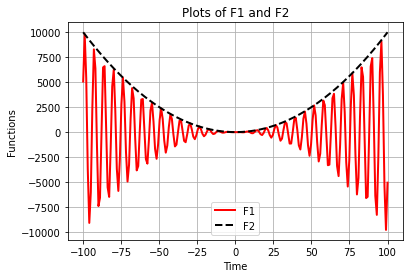

In [9]:
plt.figure()
plt.plot(the_time, F1, 'r-', linewidth=2)   # Plots F1(t) in a red solid line
plt.plot(the_time, F2, 'k--', linewidth=2)  # Plots F2(t) in a black dashed line
plt.xlabel('Time')           # Adds the label "time" to the x-axis
plt.ylabel('Functions')      # Adds the label "functions" to the y-axis
plt.legend(['F1','F2'])      # Creates a legend with entries "F1", "F2"
plt.grid(True)               # Turns on the grid lines 
plt.title('Plots of F1 and F2')  # Gives the plot a title
plt.show()  # actually show the plot (more important when not using a Jupyter notebook)

In [5]:
# Linear System Solving (2 equations + 2 unknowns) 

# Imagine we have the following 2 algebraic equations
# z  + 2y = 1
# 4z + 5y = 1

A = np.array([[1, 2], [4, 5]])
b = np.array([1, 1])

# The following will solve Ax = b in a least-squares sense (if an exact solution doesn't exist)
# Note that this is usually what A\b does in matlab

#  if function returns a bunch of stuff, and you don't care about that stuff, use a _
x, _, _, _ = np.linalg.lstsq(A, b) 
print('Ax - b = ', A @ x - b)

# Even for very large system

AA = np.random.randn(100, 100)
bb = np.random.randn(100)

xx, _, _, _ = np.linalg.lstsq(AA, bb)  
print('sum(AAxx - bb) = ', np.sum(AA @ xx - bb))  # get like 1e-14, pretty close to zero

# You might get a FutureWarning here -- this is letting you know something
# might be off in the lstsq function -- in this case it is fine

Ax - b =  [-1.11022302e-16  1.33226763e-15]
sum(AAxx - bb) =  8.780823290699402e-14


<ipython-input-5-f32bcafc0812>:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x, _, _, _ = np.linalg.lstsq(A, b)
<ipython-input-5-f32bcafc0812>:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  xx, _, _, _ = np.linalg.lstsq(AA, bb)


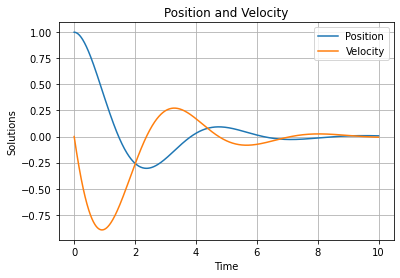

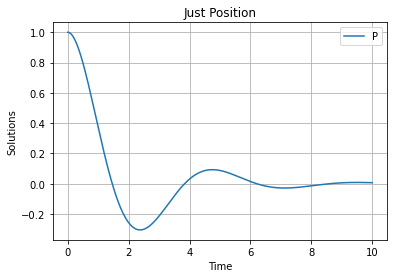

In [6]:
# Ordinary Differential Equations (ODE)
from scipy.integrate import solve_ivp  # import the standard ODE solver in Python

TSpan = [0, 10]     # Initial Time and Final Time
t = np.linspace(0, 10, 1000)
X_initial = [1, 0]  # Initial Conditions

# solve_ivp wants a true function with arguments -- good time to show how to do that:
# define a function that takes t and X0 as arguments, and returns 
def ode_test(t, X0): 
    X = np.zeros(2)
    lam = 2
    zeta = 1
    X[0] = X0[1]
    X[1] = - lam * X0[0] - zeta * X0[1]
    return X

# Now that we have defined a function that we want to call, solve the ODE
# Calls the function ode_test at each time step and solves for new state
# given initial state then repeats at every time step.
ode_test_solution = solve_ivp(ode_test, TSpan, X_initial, t_eval=t)
T_out = t
Y_out = ode_test_solution.y.T  # transpose the solution for indexing later

plt.figure()
plt.plot(T_out, Y_out)
plt.xlabel('Time')
plt.ylabel('Solutions')
plt.legend(['Position', 'Velocity'])
plt.title('Position and Velocity')
plt.grid(True)

plt.figure()
plt.plot(T_out, Y_out[:, 0])  # The ":" here takes all elements in the rows 
                              # associated with the first column. This is called
                              # index slicing and it is incredibly useful.
plt.xlabel('Time')
plt.ylabel('Solutions')
plt.legend('Position')
plt.title('Just Position')
plt.grid(True)


In [7]:
# Animate your plots (if time)
import matplotlib.animation as animation  # import the standard animation library

# Enable an interactive plot in a Jupyter notebook
%matplotlib notebook

# Define a function to update your animation
def update_line(num, t, data, line):
    line.set_data(t[:num], data[:num])
    return line,

<IPython.core.display.Javascript object>


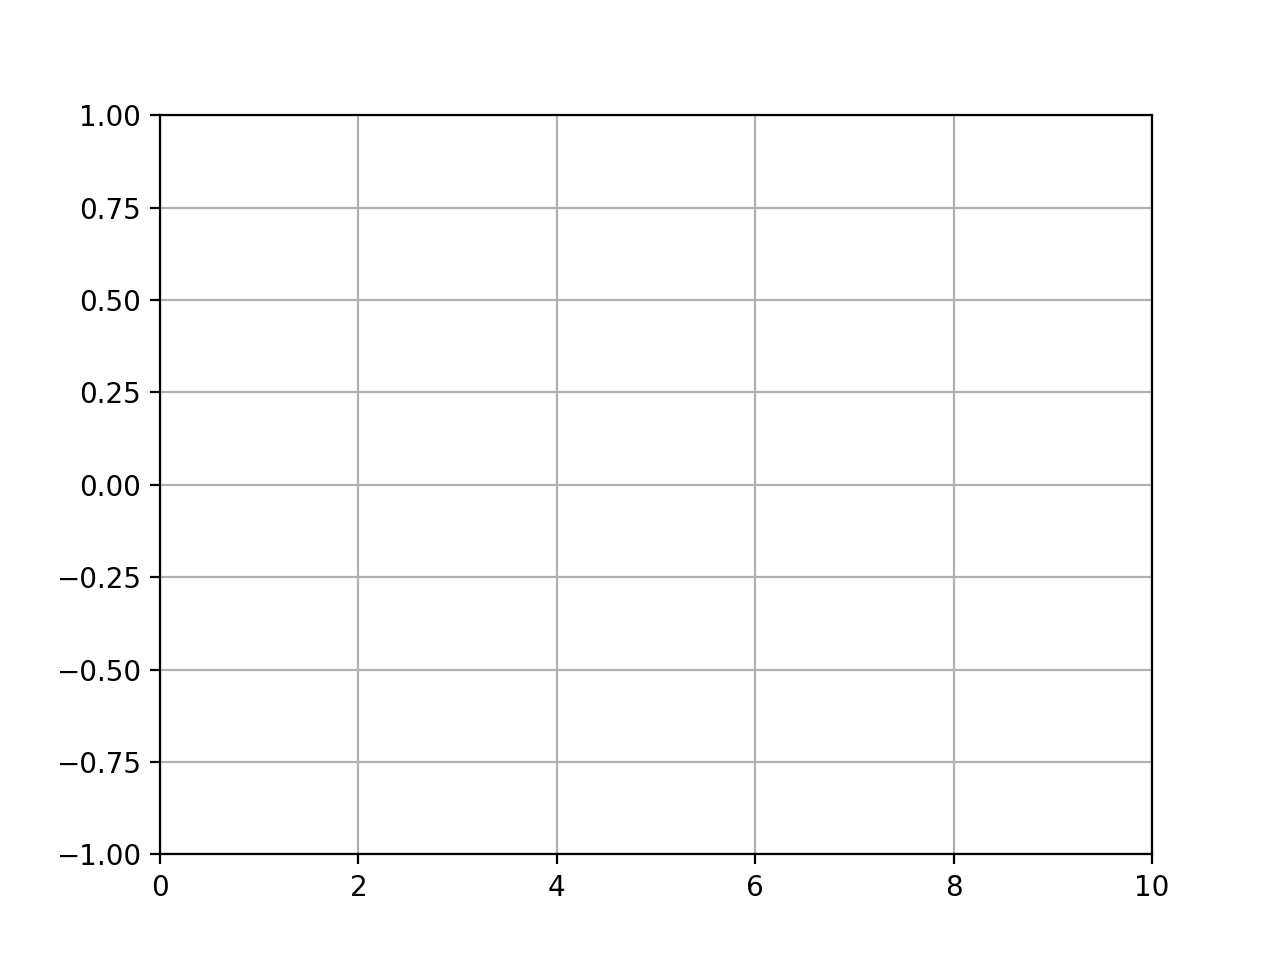

<IPython.core.display.Javascript object>


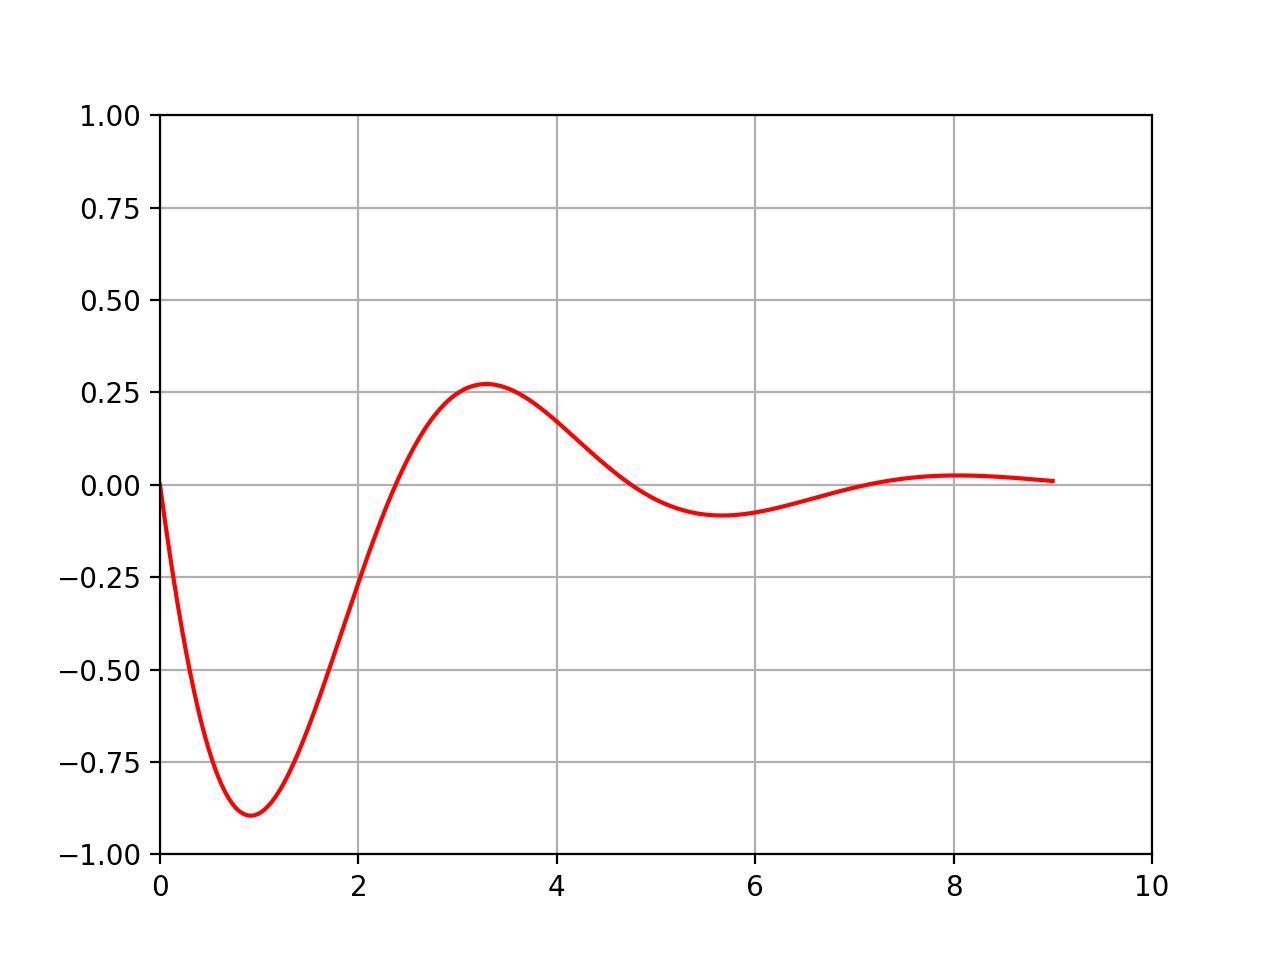

In [8]:
fig = plt.figure()
l, = plt.plot([], [], 'b')  # this code looks like nonsense but stick with it
plt.xlim(0, 10)
plt.ylim(-1, 1)
plt.grid(True)
easy_anim = animation.FuncAnimation(fig, update_line, range(0, 1000, 50), fargs=(T_out, Y_out[:, 0], l))

# repeat for v
fig = plt.figure()
l, = plt.plot([], [], 'r')  # this code looks like nonsense but stick with it
plt.xlim(0, 10)
plt.ylim(-1, 1)
plt.grid(True)
easy_anim = animation.FuncAnimation(fig, update_line, range(0, 1000, 50), fargs=(T_out, Y_out[:, 1], l))